# MAE  evaluation plots

In [1]:
import numpy as np
import pandas as pd
import os

## Config path

In [2]:
BASE_PATH = '/root/work/datasets/artwork_sequence/'
RESULT_PATH = '/root/work/artwork_sequence/predicted_tours'
PLOT_PATH = '/root/work/artwork_sequence/plots'

In [3]:
def get_predicted_tour_path(window_index):
    predicted_tour_base_path = os.path.join(RESULT_PATH,'config_'+str(window_index))

    predicted_tour_path = {
        'sequence_most_similar' : os.path.join(predicted_tour_base_path,'generated_sequence_based_previous_most_similar'),
        'sequence_rnn' : os.path.join(predicted_tour_base_path,'generated_sequence_rnn')


    }

    return predicted_tour_path

In [4]:
window_indexes = list(range(3,9))

window_config = {}

for index in window_indexes:
    window_config[index] = get_predicted_tour_path(index)
    

## Load data

In [5]:
def load_mae_data(predicted_tour_path):
    #load data
    mae_dict = {}
    for key, value in predicted_tour_path.items():
        mae_dict[key] = pd.read_csv(os.path.join(value,'mae.csv'))
    
    #Add model name to the dataframe
    for key, df in mae_dict.items():
        df['model'] = key

    #Concat all dataframe in one to plot MAE
    df_mae = pd.concat(list(mae_dict.values()))
    df_mae = df_mae.reset_index(drop=False)

    return df_mae

In [6]:
window_mae = {}

for index, path in window_config.items():
    window_mae[index] = load_mae_data(path)

## Plot MAE

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Plot mae for each tour

In [18]:
#Define nums of cols and rows in the plot
ncols = 2
nrows = len(window_indexes)//ncols

#Divide indixes in two set for plot
low_half_indexes = window_indexes[:len(window_indexes)//ncols]
high_half_indexes = window_indexes[len(window_indexes)//ncols:]

In [11]:
list(window_mae.keys())

[3, 4, 5, 6, 7, 8]

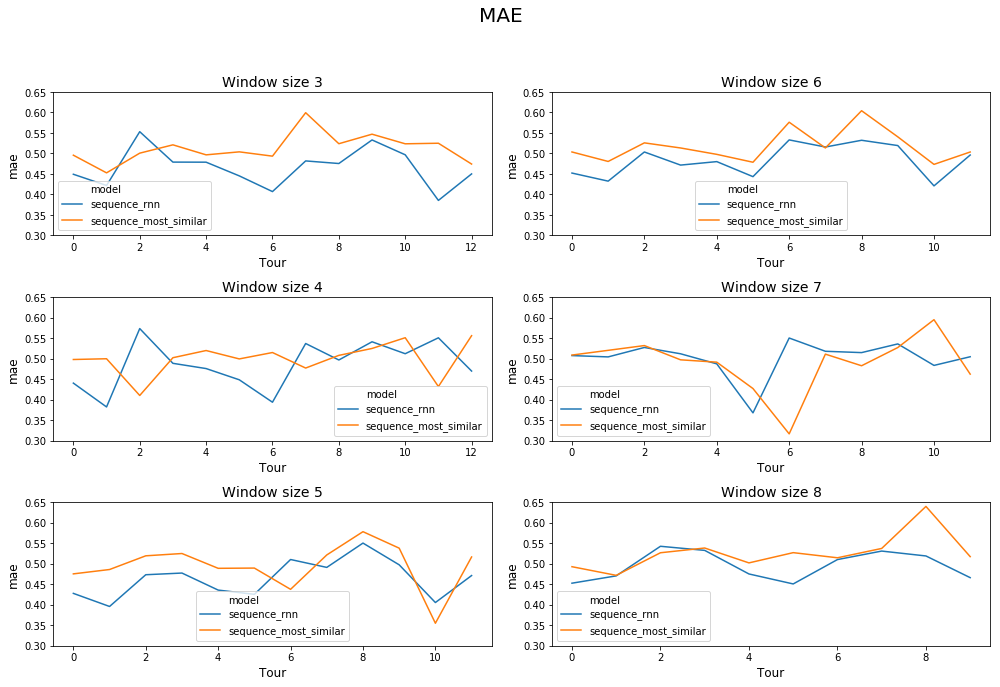

In [47]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,10))

fig.suptitle('MAE', fontsize=20)

index = window_indexes[0]

for i in range(ncols):
    for j in range(nrows):
        df_mae = window_mae[index]
        #Plot
        ax = sns.lineplot('index', 'mae', hue='model', data=df_mae, ax=axs[j,i])
        ax.set_title('Window size ' + str(index), fontdict={'fontsize': 14, 'fontweight': 'medium'} )
        ax.set_xlabel("Tour",fontsize=12)
        ax.set_ylabel("mae",fontsize=12)
        ax.set_ylim(bottom=0.3, top=0.65)

        index +=1
        
    

fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [48]:
fig.savefig(os.path.join(PLOT_PATH,"mae_tour.png"), dpi=100)

### Plot Global MAE

In [33]:
def get_mae_global(model):
    
    df_mae_global = pd.DataFrame({ 'model' : [],
                         'index' : [],
                         'mae_global' : []})
    
    
    for index in window_indexes:
        df_mae = window_mae[index]
        mean_mae = df_mae[df_mae['model'] == model]['mae'].mean()
        
        #Save MAE
        df_mae_global = df_mae_global.append(
            {'model' : model,
             'index': index,
             'mae_global': mean_mae
            }, 
           ignore_index=True)

    
    return df_mae_global

In [35]:
models = ['sequence_most_similar', 'sequence_rnn']

df_mae_global_list = []

for m in models:
    df_mae_global = get_mae_global(m)
    df_mae_global_list.append(df_mae_global)

df_mae_global = pd.concat(df_mae_global_list)

(0.44, 0.55)

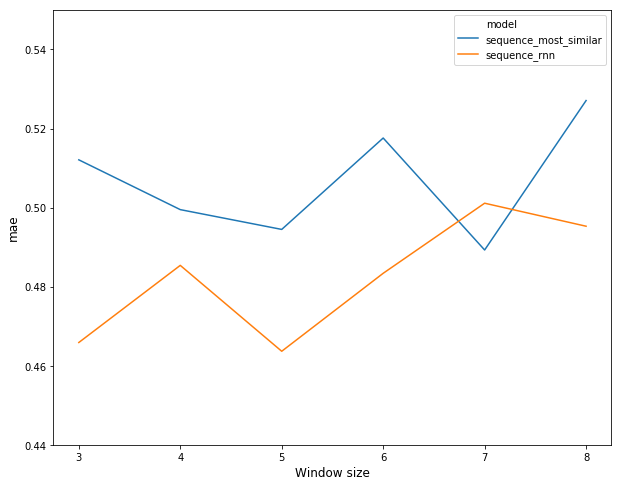

In [41]:
fig= plt.figure(figsize=(10,8))

ax = sns.lineplot(x="index", y='mae_global', hue='model', data=df_mae_global)

ax.set_xlabel("Window size",fontsize=12)
ax.set_ylabel("mae",fontsize=12)
ax.set_ylim(bottom=0.44, top=0.55)

In [38]:
fig.savefig(os.path.join(PLOT_PATH,"mae_global.png"), dpi=100)